Plot time series of temperature, mass loss, and sea level rise for a single ensemble member

SSP: 245
ESM: EC-Earth 3
ISM: CISM_NCA

Plot iterations, highlighting first and last

Plot T, ML, SLR for each basin and Antarctic-wide (6x3 plots)

In [1]:
import numpy as np
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt

import sys
sys.path.append('../src')
import utils as ut

In [2]:
ds = xr.open_dataset('../data/dummy.nc')
ds = ds.isel(exp=slice(0,5))

In [8]:
ism = 'CISM_NCA'
esm = 'EC-Earth3-Veg'
ssp = '245'
bmp = 'lin'

In [9]:
TMP,IML,SLR = ut.iterate(ds,ism=ism,esm=esm,ssp=ssp,bmp=bmp)

In [10]:
mpl.rcParams['figure.subplot.wspace'] = .1
mpl.rcParams['figure.subplot.left'] = .15
mpl.rcParams['figure.subplot.right'] = .99
mpl.rcParams['figure.figsize'] = (7,5)

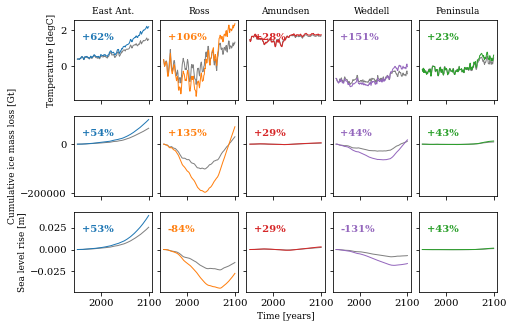

In [11]:
fig,ax = plt.subplots(3,5,sharex=True,sharey='row')

for b,bas in enumerate(ds.basin.values):
    for v,var in enumerate([TMP,np.cumsum(IML,axis=1),SLR]):
        dax = ax[v,b]
        dax.plot(ds.time,var[0,:,b],c='.5')
        for n in range(1,TMP.shape[0]):
            dax.plot(ds.time,var[n,:,b],c=ut.bcol[bas])
        dax.text(.1,.75,f"{100*((var[-1,-1,b]-var[-1,0,b])-(var[0,-1,b]-var[0,0,b]))/np.abs(var[0,-1,b]-var[0,0,b]):+.0f}%",transform=dax.transAxes,weight='bold',c=ut.bcol[bas])
        
    ax[0,b].set_title(bas)
ax[-1,2].set_xlabel('Time [years]')
ax[0,0].set_ylabel('Temperature [degC]')
ax[1,0].set_ylabel('Cumulative ice mass loss [Gt]')
ax[2,0].set_ylabel('Sea level rise [m]')

plt.savefig(f'../draftfigs/single_ensemble.png',dpi=450)
plt.show()
ds.close()